### Requisito 4. **Análisis Gráfico de los Datos**
**Resumen:** La visualización de datos es clave para identificar patrones y relaciones entre diferentes variables. Los gráficos apropiados pueden proporcionar información valiosa sobre el comportamiento de los precios y volúmenes de ventas.

1. **Gráfico de Violín de Volumen de Ventas por Región:**
   - **Uso de Datos:** Usa las columnas `Total Volume` y `region`.
   - **Esperado:** Visualiza la distribución de ventas en diferentes regiones.
     - Utiliza la función `violinplot` de `seaborn` para crear gráficos de violín.
     - Configura los ejes para mostrar la relación entre `Total Volume` y `region`.
     - Añade etiquetas y títulos usando `plt.title()` y `plt.xlabel()` para facilitar la interpretación.

2. **Boxplot Comparativo de Precios entre Años:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `year`.
   - **Esperado:** Genera boxplots para comparar la distribución de precios.
     - Utiliza `boxplot` de `seaborn` para crear boxplots que comparen `AveragePrice` entre diferentes años.
     - Asegúrate de que cada boxplot represente un año diferente.
     - Incluye etiquetas y títulos descriptivos usando `plt.title()`.

3. **Histograma de Volumen Total de Ventas:**
   - **Uso de Datos:** Usa la columna `Total Volume`.
   - **Esperado:** Crea un histograma para mostrar la distribución del volumen total de ventas.
     - Utiliza `hist()` de `matplotlib` para crear el histograma.
     - Ajusta el número de bins para una visualización clara usando el parámetro `bins`.
     - Añade etiquetas y un título que describa lo que se muestra.

4. **Gráfico de Barras de Ventas por Tipo de Bolsa:**
   - **Uso de Datos:** Utiliza las columnas `Total Bags`, `Small Bags`, `Large Bags` y `XLarge Bags`.
   - **Esperado:** Compara las ventas de diferentes tipos de bolsas.
     - Suma los volúmenes de ventas por tipo de bolsa utilizando `sum()`.
     - Crea un gráfico de barras con `plt.bar()` para mostrar las diferencias en ventas.
     - Asegúrate de incluir etiquetas para cada tipo de bolsa.

5. **Gráfico de Líneas de Precios Promedios por Año:**
   - **Uso de Datos:** Utiliza las columnas `AveragePrice` y `year`.
   - **Esperado:** Visualiza la tendencia de precios promedio a lo largo de los años.
     - Agrupa los datos por `year` y calcula el promedio de `AveragePrice`.
     - Usa `plt.plot()` para crear un gráfico de líneas que muestre la evolución de precios.
     - Añade un título y etiquetas descriptivas a los ejes usando `plt.title()` y `plt.xlabel()`.

In [12]:
import pandas as pd
import os

#cargar datos
current_path = os.getcwd()
aguacate_index = current_path.find("uoc-proyecto3")
if aguacate_index != -1:
        project_root = current_path[:aguacate_index + len("uoc-proyecto3")]
else:
    raise FileNotFoundError("The directory 'uoc-proyecto3' was not found in the path.")
data_path = os.path.join(project_root, 'data', 'Avocado_HassAvocadoBoard_20152023v1.0.1.csv')
dataset_avocado_original_df = pd.read_csv(data_path)


region_classification = {
    'Albany': 'City',
    'Atlanta': 'City',
    'BaltimoreWashington': 'Region',
    'BirminghamMontgomery': 'Region',
    'Boise': 'City',
    'Boston': 'City',
    'BuffaloRochester': 'Region',
    'California': 'GreaterRegion',
    'Charlotte': 'City',
    'Chicago': 'City',
    'CincinnatiDayton': 'Region',
    'Columbus': 'City',
    'DallasFtWorth': 'Region',
    'Denver': 'City',
    'Detroit': 'City',
    'GrandRapids': 'City',
    'GreatLakes': 'GreaterRegion',
    'HarrisburgScranton': 'Region',
    'HartfordSpringfield': 'Region',
    'Houston': 'City',
    'Indianapolis': 'City',
    'Jacksonville': 'City',
    'LasVegas': 'City',
    'LosAngeles': 'City',
    'Louisville': 'City',
    'Miami': 'City',
    'MiamiFtLauderdale': 'Region',
    'Midsouth': 'GreaterRegion',
    'Nashville': 'City',
    'NewOrleans': 'City',
    'NewYork': 'City',
    'Northeast': 'GreaterRegion',
    'NorthernNewEngland': 'Region',
    'Orlando': 'City',
    'PeoriaSpringfield': 'Region',
    'Philadelphia': 'City',
    'PhoenixTucson': 'Region',
    'Pittsburgh': 'City',
    'Plains': 'GreaterRegion',
    'Portland': 'City',
    'Providence': 'City',
    'RaleighGreensboro': 'Region',
    'RichmondNorfolk': 'Region',
    'Roanoke': 'City',
    'Sacramento': 'City',
    'SanDiego': 'City',
    'SanFrancisco': 'City',
    'Seattle': 'City',
    'SouthCarolina': 'Region',
    'SouthCentral': 'GreaterRegion',
    'Southeast': 'GreaterRegion',
    'Spokane': 'City',
    'StLouis': 'City',
    'Syracuse': 'City',
    'Tampa': 'City',
    'Toledo': 'City',
    'TotalUS': 'TotalUS',
    'West': 'GreaterRegion',
    'WestTexNewMexico': 'Region',
    'Wichita': 'City'
}

def map_regions(original_data: pd.DataFrame, region_map: dict, guardar: bool = False) -> pd.DataFrame:
    """
    Asigna la clasificación de regiones y ciudades al dataframe original de aguacate
    en una nueva columna region_type

    Parametros:
    - original_data: pd.DataFrame-  Datos originales avocado.csv
    - region_map: Dict[str, str] - El mapping de agrupaciones
    - guardar: Boolean - True or False para guardar nuevo csv o no

    Regresa:
    - pd.DataFrame: Dataframe actualizado de los datos originales
    """

    path_salida = "data/avocado_with_region_types.csv"
    nuevo_aguacate_df = original_data.copy()
    nuevo_aguacate_df['region_type'] = nuevo_aguacate_df['region'].map(region_map)
    if guardar:
        print(f"Guardando archivo .csv en /data/  ...")
        nuevo_aguacate_df.to_csv(path_salida, index=False)
    else:
        pass

    return nuevo_aguacate_df

def obtener_nuevo_avocado()-> pd.DataFrame:
    """
    Función que devuelve dataframe con columna region_type

    Regresa:
    - pd.DataFrame: DataFrame con columna nueva que agrupa regiones para análisis
    """

    nuevo_avocado_df = map_regions(dataset_avocado_original_df, region_classification, guardar=False)
    return nuevo_avocado_df



In [13]:
##### Cargar librerias
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd

df_orig = obtener_nuevo_avocado()

# guardamos el original y trabajamos con una copia
df = df_orig.copy()

# Convierte Date a tipo datetime usando pd.to_datetime().
# Convierte la columna de fecha a un formato adecuado.
# Convierte Date a tipo datetime usando pd.to_datetime().
# Convierte la columna de fecha a un formato adecuado y agrupa los datos mensuales para visualizar las tendencias de ventas en un gráfico.

df['Date'] = pd.to_datetime(df['Date'])

# añadimos columna 'year'
df['year'] = df['Date'].dt.year  # Extract the year from the datetime column

# Agrupa los datos por Date y calcula el promedio de AveragePrice utilizando groupby() si es necesario.

df[["Date", "region", "region_type", "AveragePrice"]].groupby(by=["Date","region_type", "region"]).mean()

# Filtrar los datos para 'GreaterRegion' en la columna 'region_type'
df_reduced = df.loc[df['region_type'] == 'GreaterRegion'].copy()
df_cities = df.loc[df['region_type'] == 'City'].copy()
df_regions = df.loc[df['region_type'] == 'Region'].copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          53415 non-null  datetime64[ns]
 1   AveragePrice  53415 non-null  float64       
 2   TotalVolume   53415 non-null  float64       
 3   plu4046       53415 non-null  float64       
 4   plu4225       53415 non-null  float64       
 5   plu4770       53415 non-null  float64       
 6   TotalBags     53415 non-null  float64       
 7   SmallBags     41025 non-null  float64       
 8   LargeBags     41025 non-null  float64       
 9   XLargeBags    41025 non-null  float64       
 10  type          53415 non-null  object        
 11  region        53415 non-null  object        
 12  region_type   53415 non-null  object        
 13  year          53415 non-null  int32         
dtypes: datetime64[ns](1), float64(9), int32(1), object(3)
memory usage: 5.5+ MB


In [14]:
# Select relevant columns for correlation analysis
correlation_data = df[['TotalVolume', 'plu4046', 'plu4225', 'plu4770', 'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags']]

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Display the correlation matrix
print(correlation_matrix)

             TotalVolume   plu4046   plu4225   plu4770  TotalBags  SmallBags  \
TotalVolume     1.000000  0.966413  0.930966  0.817264   0.965620   0.707320   
plu4046         0.966413  1.000000  0.880644  0.828545   0.920839   0.673314   
plu4225         0.930966  0.880644  1.000000  0.803806   0.893413   0.714187   
plu4770         0.817264  0.828545  0.803806  1.000000   0.775465   0.639742   
TotalBags       0.965620  0.920839  0.893413  0.775465   1.000000   0.829143   
SmallBags       0.707320  0.673314  0.714187  0.639742   0.829143   1.000000   
LargeBags       0.587231  0.590021  0.650030  0.585541   0.723625   0.818300   
XLargeBags      0.540959  0.475127  0.446047  0.429754   0.628063   0.773208   

             LargeBags  XLargeBags  
TotalVolume   0.587231    0.540959  
plu4046       0.590021    0.475127  
plu4225       0.650030    0.446047  
plu4770       0.585541    0.429754  
TotalBags     0.723625    0.628063  
SmallBags     0.818300    0.773208  
LargeBags     1.0000

2.1. **Gráfico de Violín de Volumen de Ventas por Región:**
   - **Uso de Datos:** Usa las columnas `Total Volume` y `region`.
   - **Esperado:** Visualiza la distribución de ventas en diferentes regiones.
     - Utiliza la función `violinplot` de `seaborn` para crear gráficos de violín.
     - Configura los ejes para mostrar la relación entre `Total Volume` y `region`.
     - Añade etiquetas y títulos usando `plt.title()` y `plt.xlabel()` para facilitar la interpretación.

/tmp/ipykernel_12784/1016296501.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="region", y="TotalVolume", data=df_cities, palette='pastel6')


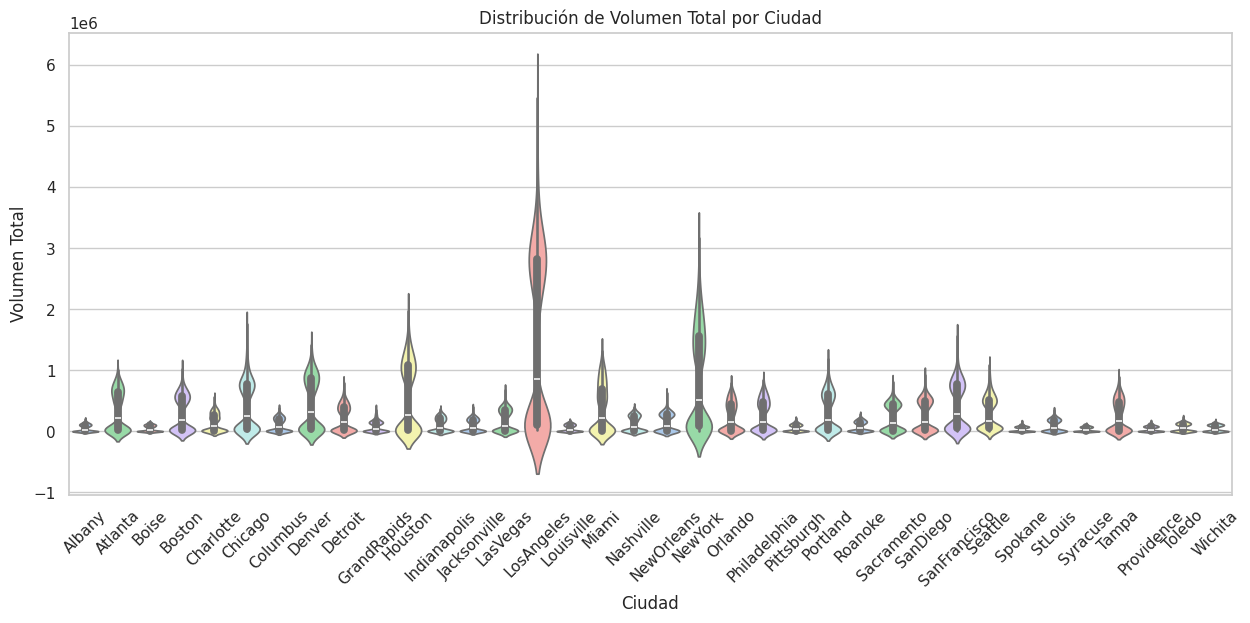

In [15]:
"""
Gráfico de Violín de Volumen de Ventas por Región:

Uso de Datos: Usa las columnas Total Volume y region.
Esperado: Visualiza la distribución de ventas en diferentes regiones.
Utiliza la función violinplot de seaborn para crear gráficos de violín.
Configura los ejes para mostrar la relación entre Total Volume y region.
Añade etiquetas y títulos usando plt.title() y plt.xlabel() para facilitar la interpretación
"""
# 2.1. Gráfico de Violín de Volumen de Ventas por Region
# Filtrar los datos para 'GreaterRegion' en la columna 'region_type'


plt.figure(figsize=(15, 6))
sns.violinplot(x="region", y="TotalVolume", data=df_cities, palette='pastel6')
plt.title("Distribución de Volumen Total por Ciudad")
plt.xlabel("Ciudad")
plt.ylabel("Volumen Total")
plt.xticks(rotation=45) # inclinar etiquetas
plt.show()

/tmp/ipykernel_12784/1991240138.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="region", y="TotalVolume", data=df_regions, palette='pastel6')


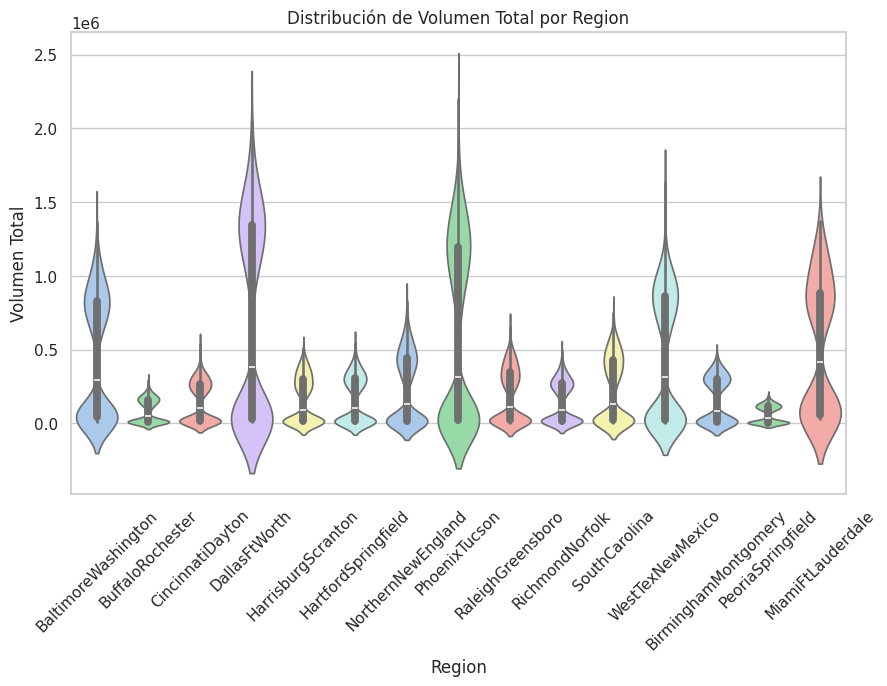

In [16]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="region", y="TotalVolume", data=df_regions, palette='pastel6')
plt.title("Distribución de Volumen Total por Region")
plt.xlabel("Region")
plt.ylabel("Volumen Total")
plt.xticks(rotation=45) # inclinar etiquetas
plt.show()

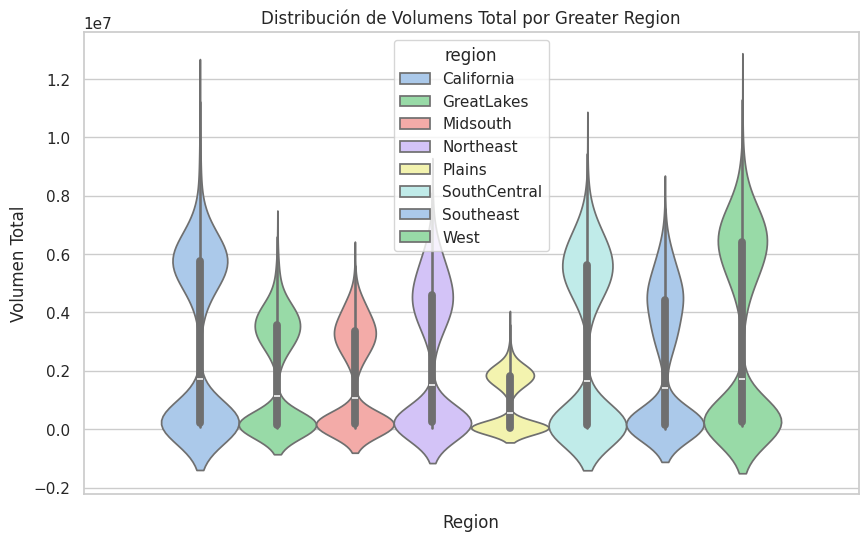

In [17]:
plt.figure(figsize=(10, 6))
sns.violinplot(hue="region", y="TotalVolume", data=df_reduced, palette='pastel6')
plt.title("Distribución de Volumens Total por Greater Region")
plt.xlabel("Region")
plt.ylabel("Volumen Total")
#plt.xticks(rotation=45) # inclinar etiquetas
plt.show()

2.2. **Boxplot Comparativo de Precios entre Años:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `year`.
   - **Esperado:** Genera boxplots para comparar la distribución de precios.
     - Utiliza `boxplot` de `seaborn` para crear boxplots que comparen `AveragePrice` entre diferentes años.
     - Asegúrate de que cada boxplot represente un año diferente.
     - Incluye etiquetas y títulos descriptivos usando `plt.title()`.

/tmp/ipykernel_12784/3573879679.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='region_type', y='AveragePrice', palette='Set2')


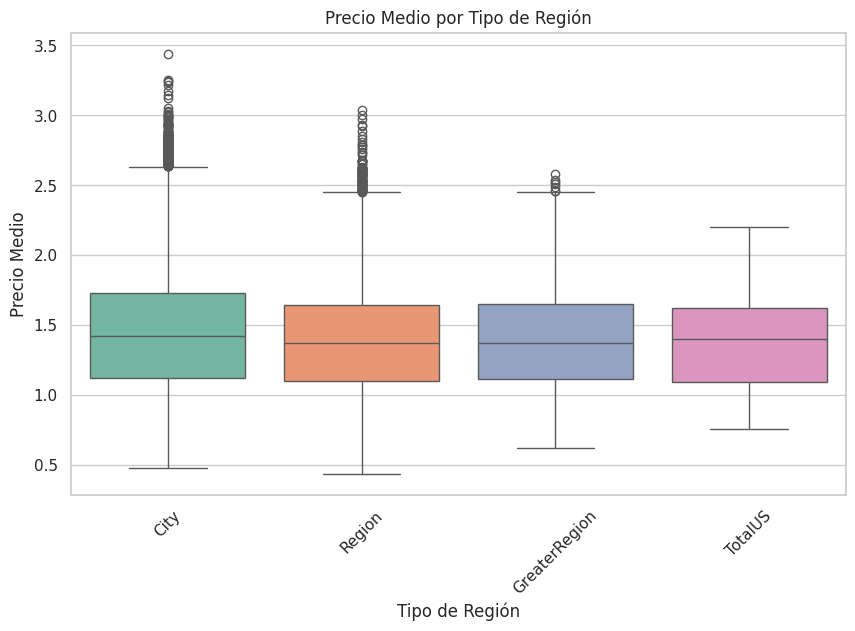

In [18]:
# Boxplot for AveragePrice by region_type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='region_type', y='AveragePrice', palette='Set2')
plt.title('Precio Medio por Tipo de Región')
plt.xlabel('Tipo de Región')
plt.ylabel('Precio Medio')
plt.xticks(rotation=45)
plt.show()


([0], [Text(0, 0, '')])

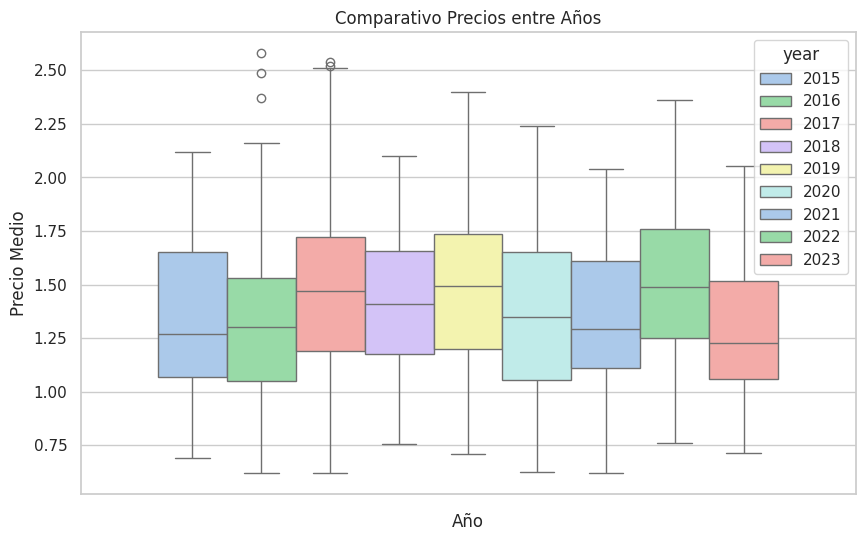

In [19]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.boxplot(hue="year", y="AveragePrice", data=df_reduced, palette='pastel6')
plt.title("Comparativo Precios entre Años")
plt.xlabel("Año")
plt.ylabel("Precio Medio")
plt.xticks(rotation=45) #


2.3. **Histograma de Volumen Total de Ventas:**
   - **Uso de Datos:** Usa la columna `Total Volume`.
   - **Esperado:** Crea un histograma para mostrar la distribución del volumen total de ventas.
     - Utiliza `hist()` de `matplotlib` para crear el histograma.
     - Ajusta el número de bins para una visualización clara usando el parámetro `bins`.
     - Añade etiquetas y un título que describa lo que se muestra.

21986.87


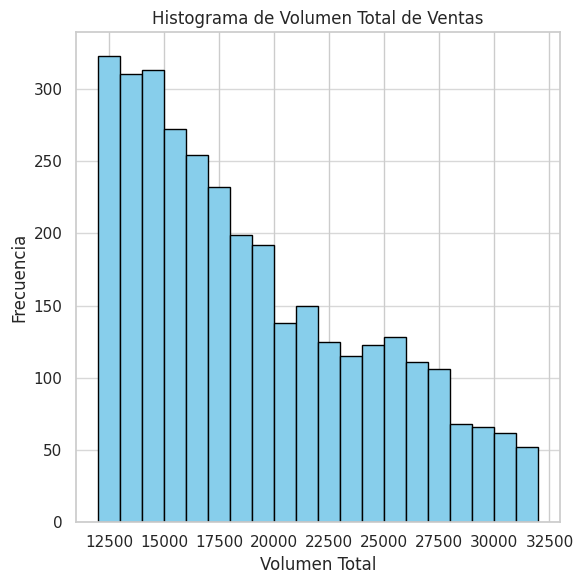

In [20]:
most_frequent_value = df_reduced['TotalVolume'].mode()[0]# Get the most repetitive value
print(most_frequent_value)
# Determine a range around the most frequent value
range_min = max(0, most_frequent_value -10000)
range_max = most_frequent_value + 10000

# Crear el histograma
plt.figure(figsize=(6, 6))
plt.hist(df_regions['TotalVolume'], bins=20, color='skyblue', edgecolor='black', range=(range_min, range_max))  # Adjust bins as needed

# Configuración del gráfico
plt.title('Histograma de Volumen Total de Ventas')
plt.xlabel('Volumen Total')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)  # Optional: Add grid lines for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

2.4. **Gráfico de Barras de Ventas por Tipo de Bolsa:**
   - **Uso de Datos:** Utiliza las columnas `Total Bags`, `Small Bags`, `Large Bags` y `XLarge Bags`.
   - **Esperado:** Compara las ventas de diferentes tipos de bolsas.
     - Suma los volúmenes de ventas por tipo de bolsa utilizando `sum()`.
     - Crea un gráfico de barras con `plt.bar()` para mostrar las diferencias en ventas.
     - Asegúrate de incluir etiquetas para cada tipo de bolsa.

[]

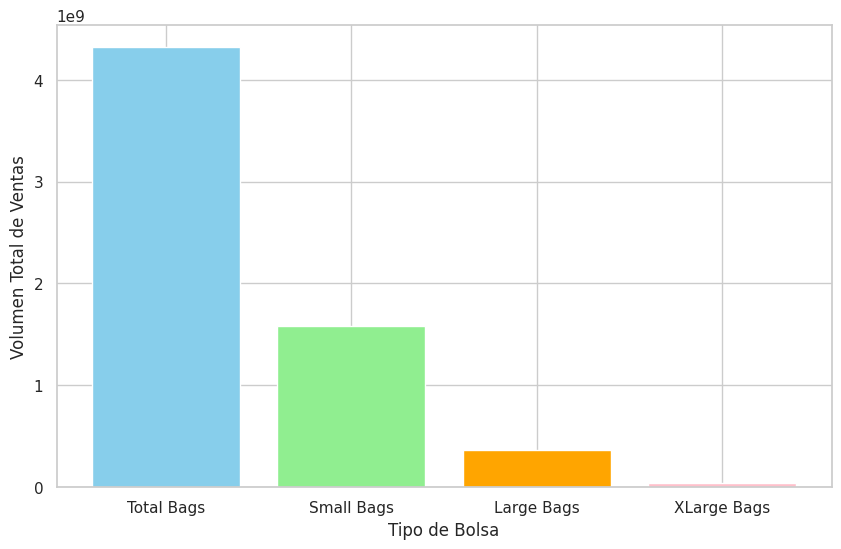

In [21]:
plt.figure(figsize=(10, 6))

# Suma los volúmenes de ventas por tipo de bolsa
total_bags = df_reduced['TotalBags'].sum()
small_bags = df_reduced['SmallBags'].sum()
large_bags = df_reduced['LargeBags'].sum()
xlarge_bags = df_reduced['XLargeBags'].sum()

# Crea un gráfico de barras
plt.bar(range(4), [total_bags, small_bags, large_bags, xlarge_bags], color=['skyblue', 'lightgreen', 'orange', 'pink'])
plt.xticks(range(4), ['Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'])
plt.xlabel('Tipo de Bolsa')
plt.ylabel('Volumen Total de Ventas')

plt.plot()

5. **Gráfico de Líneas de Precios Promedios por Año:**
   - **Uso de Datos:** Utiliza las columnas `AveragePrice` y `year`.
   - **Esperado:** Visualiza la tendencia de precios promedio a lo largo de los años.
     - Agrupa los datos por `year` y calcula el promedio de `AveragePrice`.
     - Usa `plt.plot()` para crear un gráfico de líneas que muestre la evolución de precios.
     - Añade un título y etiquetas descriptivas a los ejes usando `plt.title()` y `plt.xlabel()`.

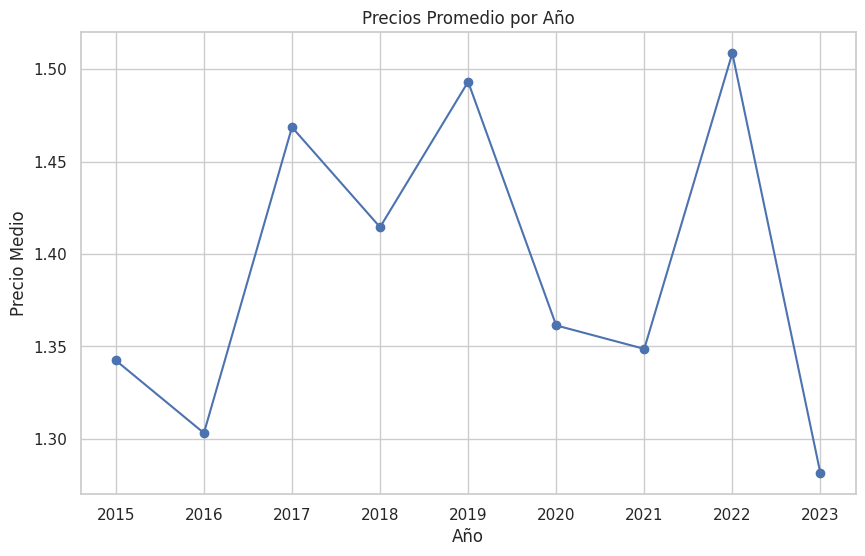

In [22]:
plt.figure(figsize=(10,6))

# agrupa los datos por year y calcula el promedio de AveragePrice
df_grouped = df_reduced.groupby('year')['AveragePrice'].mean().reset_index()

# crea un gráfico de líneas
plt.plot(df_grouped['year'], df_grouped['AveragePrice'], marker='o', linestyle='-')
plt.title('Precios Promedio por Año')
plt.xlabel('Año')
plt.ylabel('Precio Medio')
plt.grid(True)
plt.show()
